## 建置環境

In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies


  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install git+https://github.com/ytdl-org/youtube-dl.git@master#egg=youtube_dl
  # build openpose
  with open("/content/openpose/CMakeLists.txt","r") as f:
    lines = list()
    for line in f:
      if '78287B57CF85FA89C03F1393D368E5B7' in line:
        line = line.replace('78287B57CF85FA89C03F1393D368E5B7','d41d8cd98f00b204e9800998ecf8427e')
      if '78287b57cf85fa89c03f1393d368e5b7' in line:
        line = line.replace('78287b57cf85fa89c03f1393d368e5b7','d41d8cd98f00b204e9800998ecf8427e')
      if 'e747180d728fa4e4418c465828384333' in line:
        line = line.replace('e747180d728fa4e4418c465828384333','d41d8cd98f00b204e9800998ecf8427e')
      if 'a82cfc3fea7c62f159e11bd3674c1531' in line:
        line = line.replace('a82cfc3fea7c62f159e11bd3674c1531','d41d8cd98f00b204e9800998ecf8427e')
      lines.append(line)
    f.close()
  # replacing the hash of the CMakeLists.txt
  with open("/content/openpose/CMakeLists.txt","w") as f:
    for line in lines:
        f.writelines(line)
    f.close()
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. -DUSE_CUDNN=OFF && make -j`nproc`

from IPython.display import YouTubeVideo

Selecting previously unselected package liblmdb0:amd64.
(Reading database ... 121658 files and directories currently installed.)
Preparing to unpack .../00-liblmdb0_0.9.24-1build2_amd64.deb ...
Unpacking liblmdb0:amd64 (0.9.24-1build2) ...
Selecting previously unselected package libgflags2.2.
Preparing to unpack .../01-libgflags2.2_2.2.2-2_amd64.deb ...
Unpacking libgflags2.2 (2.2.2-2) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../02-libgflags-dev_2.2.2-2_amd64.deb ...
Unpacking libgflags-dev (2.2.2-2) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../03-libgoogle-glog0v5_0.5.0+really0.4.0-2_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.5.0+really0.4.0-2) ...
Selecting previously unselected package libunwind-dev:amd64.
Preparing to unpack .../04-libunwind-dev_1.3.2-2build2.1_amd64.deb ...
Unpacking libunwind-dev:amd64 (1.3.2-2build2.1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to un

## 連結雲端

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 刪除output資料夾的所有檔案

In [ ]:
!rm -f /content/openpose/output/*

In [ ]:
!rm -f /content/output.mp4
!rm -f /content/video.mp4

## 讀取影片範圍

In [ ]:
video_path = '/content/drive/MyDrive/Graduation project/test_video/test_2/test1228.mp4'
# video_path = '/content/drive/MyDrive/20231208_145718.mp4'

# 特定秒數
# !ffmpeg -y -loglevel info -i "{video_path}" -ss '00:00:02' -to '00:00:20' video.mp4

# 完整影片
# !ffmpeg -y -loglevel info -i "{video_path}" video.mp4

# 旋轉影片
# transpose=1：順時針旋轉90度（向右旋轉）--> 測右腳
# transpose=2：逆時針旋轉90度（向左旋轉）--> 測左腳
!ffmpeg -y -loglevel info -i "{video_path}" -vf 'transpose=1' -c:a copy video.mp4
# !ffmpeg -y -loglevel info -i "{video_path}" -ss '00:00:10' -to '00:00:35' -vf 'transpose=2' -c:a copy video.mp4

# Check if video.mp4 exists
import os
if os.path.exists('/content/video.mp4'):
    # Run the subsequent commands
    !rm openpose.avi
    !cd /content/openpose && ./build/examples/openpose/openpose.bin --video /content/video.mp4 --write_json ./output/ --display 0 --write_video ../openpose.avi
    # Convert the result into MP4
    !ffmpeg -y -loglevel info -i openpose.avi output.mp4
else:
    print("Video file not found. Please check if the FFmpeg command ran successfully.")


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

## body_25 偵測影片結果

In [ ]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

## 直接繪製折線圖
### 12 to 14

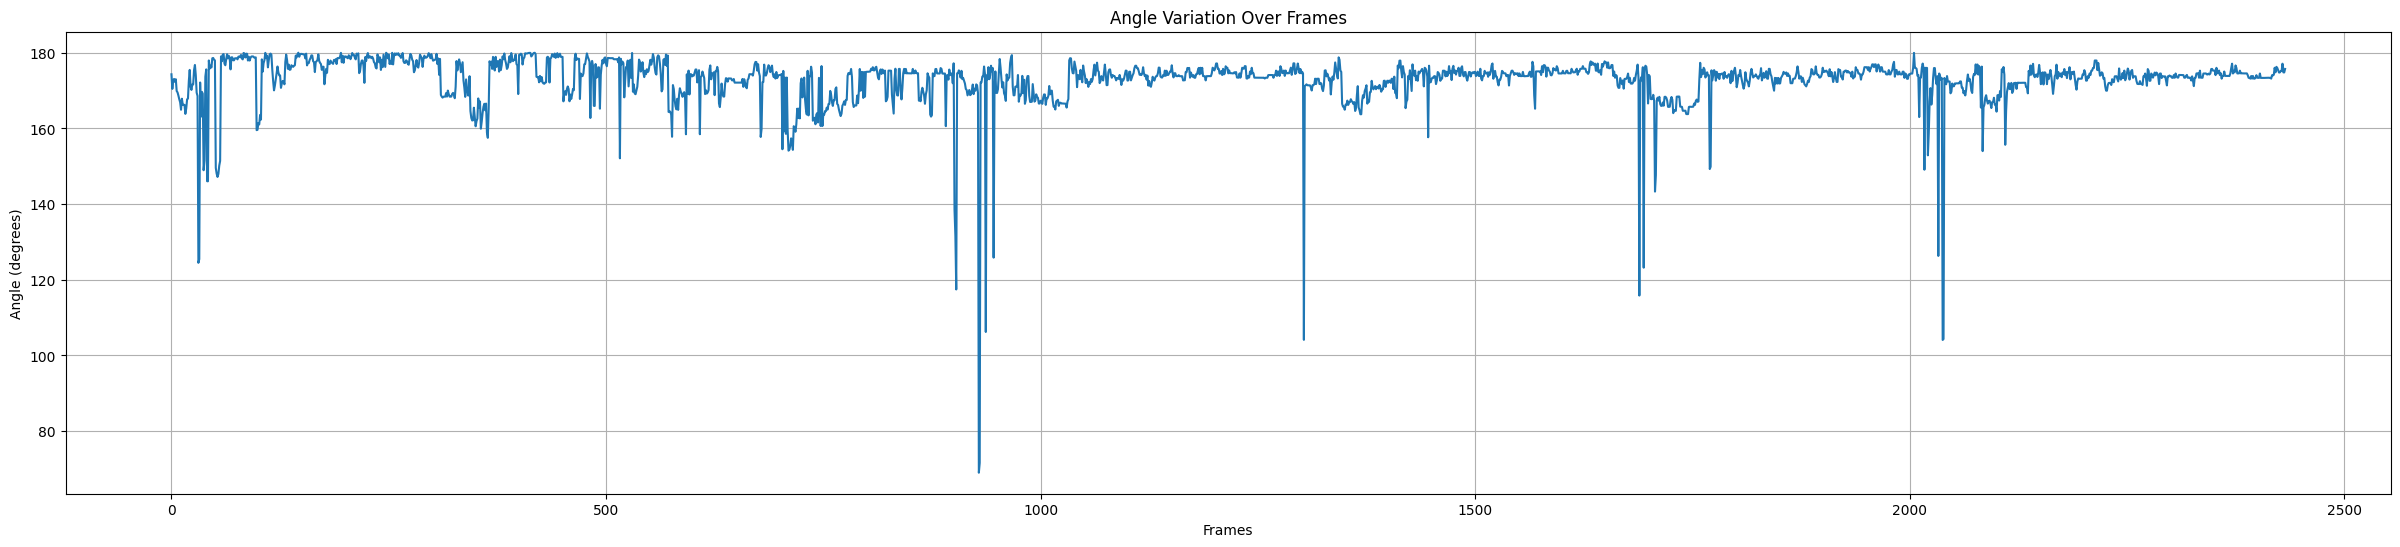

In [ ]:
import matplotlib.pyplot as plt
import os
import json
import numpy as np

# 要處理的資料夾路徑
folder_path = '/content/openpose/output'

# 收集該資料夾中所有的JSON檔案路徑
file_paths = sorted([os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.json')])

angles = []

for file_path in file_paths:
    with open(file_path) as f:
        data = json.load(f)
    # print(file_path)

    if 'people' in data and len(data['people']) > 0:
      for person in data['people']:
        keypoints = data['people'][0]['pose_keypoints_2d']

        if not keypoints:
          continue

    x_coords = keypoints[0::3]
    y_coords = keypoints[1::3]

    if x_coords[12] != 0 and y_coords[12] != 0 and x_coords[13] != 0 and y_coords[13] != 0 and x_coords[14] != 0 and y_coords[14] != 0:
        vec_12 = np.array([x_coords[12], y_coords[12]])
        vec_13 = np.array([x_coords[13], y_coords[13]])
        vec_14 = np.array([x_coords[14], y_coords[14]])

        u = vec_12 - vec_13
        v = vec_14 - vec_13

        inner_product = np.dot(u, v)
        length_product = (np.sqrt(pow(u[0], 2) + pow(u[1], 2))) * (np.sqrt(pow(v[0], 2) + pow(v[1], 2)))

        if inner_product != 0 and length_product != 0:
            cos_angle = inner_product / length_product
            angle = np.arccos(cos_angle)
            angles.append(np.degrees(angle))

# 繪製折線圖
x_values = np.arange(len(angles))

plt.figure(figsize=(30, 6))  # 設定圖形大小
plt.plot(x_values, angles)
plt.title('Angle Variation Over Frames')
plt.xlabel('Frames')
plt.ylabel('Angle (degrees)')
plt.grid(True)
plt.show()

### keypoints 12~14 to csv

In [ ]:
import csv
import os
import json
import numpy as np
from google.colab import files

# 要處理的資料夾路徑
folder_path = '/content/openpose/output'

# 收集該資料夾中所有的JSON檔案路徑
file_paths = sorted([os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.json')])

# 創建包含需要保存的資料的列表
keypoints_data = []

for file_path in file_paths:
    with open(file_path) as f:
        data = json.load(f)

    if 'people' in data and len(data['people']) > 0:
        for person in data['people']:
            keypoints = data['people'][0]['pose_keypoints_2d']

            if not keypoints:
                continue

            x_coords = keypoints[0::3]
            y_coords = keypoints[1::3]
            c_coords = keypoints[2::3]

            if x_coords[12] != 0 and y_coords[12] != 0 and x_coords[13] != 0 and y_coords[13] != 0 and x_coords[14] != 0 and y_coords[14] != 0:
              keypoints_data.append([x_coords[12], y_coords[12], c_coords[12], x_coords[13], y_coords[13], c_coords[13], x_coords[14], y_coords[14], c_coords[14]])

# 將資料寫入CSV檔案
csv_filename = 'keypoints_12to14_pro.csv'
csv_file_path = os.path.join(folder_path, csv_filename)

with open(csv_file_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['X_12', 'Y_12', 'C_12', 'X_13', 'Y_13', 'C_13', 'X_14', 'Y_14', 'Y_14'])  # 寫入標題列

    for row in keypoints_data:
        csv_writer.writerow(row)

# 使用Colab的files模組下載檔案
files.download(csv_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### angles for 12~14 to csv

In [ ]:
import matplotlib.pyplot as plt
import os
import json
import numpy as np

# 要處理的資料夾路徑
folder_path = '/content/openpose/output'

# 收集該資料夾中所有的JSON檔案路徑
file_paths = sorted([os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.json')])

angles = []

for file_path in file_paths:
    with open(file_path) as f:
        data = json.load(f)
    # print(file_path)

    if 'people' in data and len(data['people']) > 0:
      for person in data['people']:
        keypoints = data['people'][0]['pose_keypoints_2d']

        if not keypoints:
          continue

    x_coords = keypoints[0::3]
    y_coords = keypoints[1::3]

    if x_coords[12] != 0 and y_coords[12] != 0 and x_coords[13] != 0 and y_coords[13] != 0 and x_coords[14] != 0 and y_coords[14] != 0:
        vec_12 = np.array([x_coords[12], y_coords[12]])
        vec_13 = np.array([x_coords[13], y_coords[13]])
        vec_14 = np.array([x_coords[14], y_coords[14]])

        u = vec_12 - vec_13
        v = vec_14 - vec_13

        inner_product = np.dot(u, v)
        length_product = (np.sqrt(pow(u[0], 2) + pow(u[1], 2))) * (np.sqrt(pow(v[0], 2) + pow(v[1], 2)))

        if inner_product != 0 and length_product != 0:
            cos_angle = inner_product / length_product
            angle = np.arccos(cos_angle)
            angles.append(np.degrees(angle))


import csv

csv_filename = 'angles_data_12to14.csv'

with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Angles'])

    for angle in angles:
        csv_writer.writerow([angle])

files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 12~14 處理c的條件

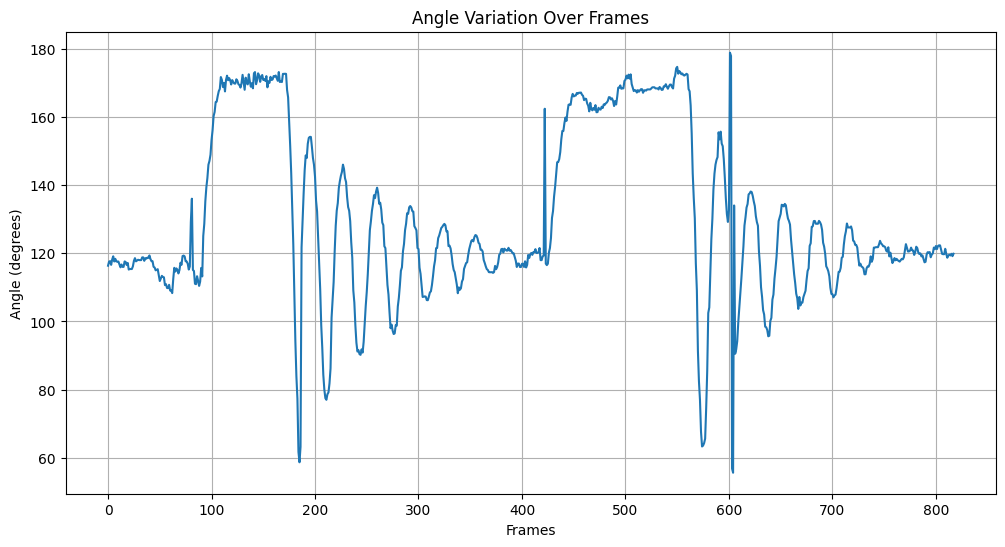

In [ ]:
import matplotlib.pyplot as plt
import os
import json
import numpy as np

# 要處理的資料夾路徑
folder_path = '/content/openpose/output'

# 收集該資料夾中所有的JSON檔案路徑
file_paths = sorted([os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.json')])

angles = []

for file_path in file_paths:
    with open(file_path) as f:
        data = json.load(f)
    # print(file_path)

    if 'people' in data and len(data['people']) > 0:
      for person in data['people']:
        keypoints = data['people'][0]['pose_keypoints_2d']

        if not keypoints:
          continue

    x_coords = keypoints[0::3]
    y_coords = keypoints[1::3]
    c_coords = keypoints[2::3]

    if c_coords[13] > 0.5:
        vec_12 = np.array([x_coords[12], y_coords[12]])
        vec_13 = np.array([x_coords[13], y_coords[13]])
        vec_14 = np.array([x_coords[14], y_coords[14]])

        u = vec_12 - vec_13
        v = vec_14 - vec_13

        inner_product = np.dot(u, v)
        length_product = (np.sqrt(pow(u[0], 2) + pow(u[1], 2))) * (np.sqrt(pow(v[0], 2) + pow(v[1], 2)))

        if inner_product != 0 and length_product != 0:
            cos_angle = inner_product / length_product
            angle = np.arccos(cos_angle)
            angles.append(np.degrees(angle))

# 繪製折線圖
x_values = np.arange(len(angles))

plt.figure(figsize=(12, 6))  # 設定圖形大小
plt.plot(x_values, angles)
plt.title('Angle Variation Over Frames')
plt.xlabel('Frames')
plt.ylabel('Angle (degrees)')
plt.grid(True)
plt.show()

### 9 to 11

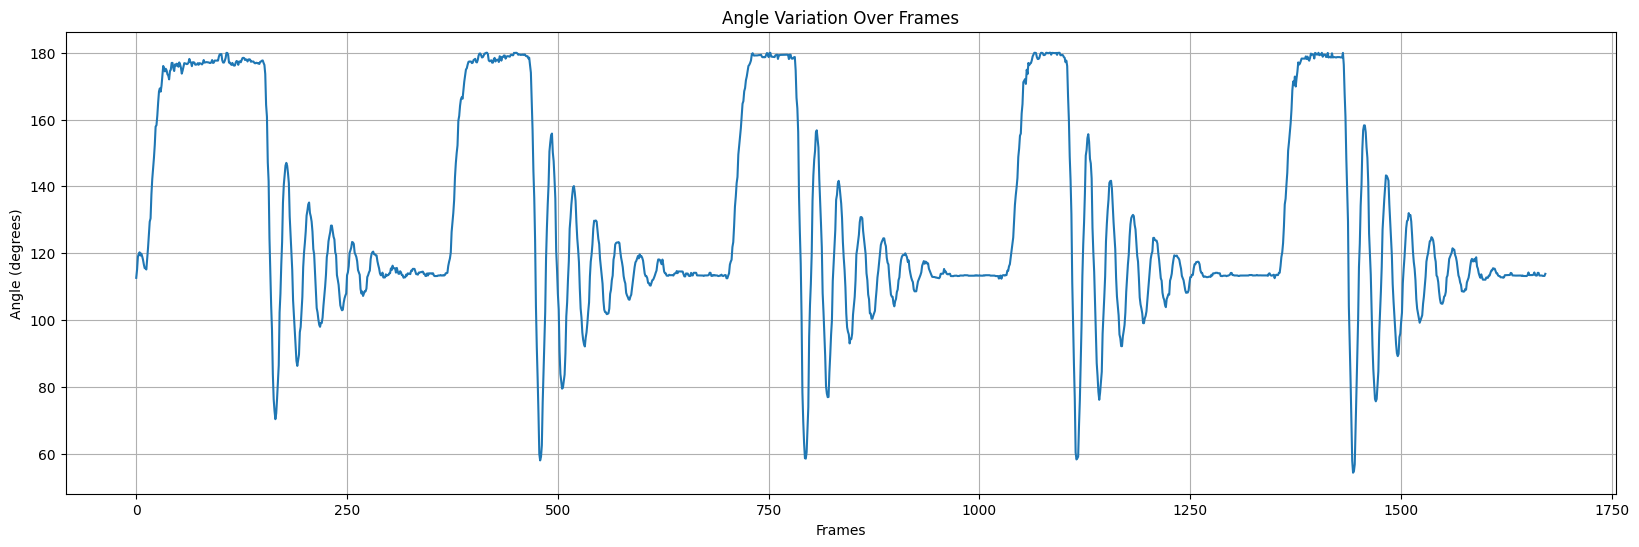

In [ ]:
import matplotlib.pyplot as plt
import os
import json
import numpy as np

# 要處理的資料夾路徑
folder_path = '/content/openpose/output'

# 收集該資料夾中所有的JSON檔案路徑
file_paths = sorted([os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.json')])

angles = []

for file_path in file_paths:
    with open(file_path) as f:
        data = json.load(f)
    # print(file_path)

    if 'people' in data and len(data['people']) > 0:
      for person in data['people']:
        keypoints = data['people'][0]['pose_keypoints_2d']

        if not keypoints:
          continue

    x_coords = keypoints[0::3]
    y_coords = keypoints[1::3]

    if x_coords[9] != 0 and y_coords[9] != 0 and x_coords[10] != 0 and y_coords[10] != 0 and x_coords[11] != 0 and y_coords[11] != 0:
        vec_9 = np.array([x_coords[9], y_coords[9]])
        vec_10 = np.array([x_coords[10], y_coords[10]])
        vec_11 = np.array([x_coords[11], y_coords[11]])

        u = vec_9 - vec_10
        v = vec_11 - vec_10

        inner_product = np.dot(u, v)
        length_product = (np.sqrt(pow(u[0], 2) + pow(u[1], 2))) * (np.sqrt(pow(v[0], 2) + pow(v[1], 2)))

        if inner_product != 0 and length_product != 0:
            cos_angle = inner_product / length_product
            angle = np.arccos(cos_angle)
            angles.append(np.degrees(angle))

# 繪製折線圖
x_values = np.arange(len(angles))

plt.figure(figsize=(20, 6))  # 設定圖形大小
plt.plot(x_values, angles)
plt.title('Angle Variation Over Frames')
plt.xlabel('Frames')
plt.ylabel('Angle (degrees)')
plt.grid(True)
plt.show()

### keypoints 9~11 to csv

In [ ]:
import csv
import os
import json
import numpy as np
from google.colab import files

# 要處理的資料夾路徑
folder_path = '/content/openpose/output'

# 收集該資料夾中所有的JSON檔案路徑
file_paths = sorted([os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.json')])

# 創建包含需要保存的資料的列表
keypoints_data = []

for file_path in file_paths:
    with open(file_path) as f:
        data = json.load(f)

    if 'people' in data and len(data['people']) > 0:
        for person in data['people']:
            keypoints = data['people'][0]['pose_keypoints_2d']

            if not keypoints:
                continue

            x_coords = keypoints[0::3]
            y_coords = keypoints[1::3]
            c_coords = keypoints[2::3]

            if x_coords[9] != 0 and y_coords[9] != 0 and x_coords[10] != 0 and y_coords[10] != 0 and x_coords[11] != 0 and y_coords[11] != 0:
              keypoints_data.append([x_coords[9], y_coords[9], c_coords[9], x_coords[10], y_coords[10], c_coords[10], x_coords[11], y_coords[11], c_coords[11]])

# 將資料寫入CSV檔案
csv_filename = 'keypoints_9to11_pro.csv'
csv_file_path = os.path.join(folder_path, csv_filename)

with open(csv_file_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['X_9', 'Y_9', 'C_9', 'X_10', 'Y_10', 'C_10', 'X_11', 'Y_11', 'C_11'])  # 寫入標題列

    for row in keypoints_data:
        csv_writer.writerow(row)

# 使用Colab的files模組下載檔案
files.download(csv_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### angles for 9~11 to csv

In [ ]:
import matplotlib.pyplot as plt
import os
import json
import numpy as np

# 要處理的資料夾路徑
folder_path = '/content/openpose/output'

# 收集該資料夾中所有的JSON檔案路徑
file_paths = sorted([os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.json')])

angles = []

for file_path in file_paths:
    with open(file_path) as f:
        data = json.load(f)
    # print(file_path)

    if 'people' in data and len(data['people']) > 0:
      for person in data['people']:
        keypoints = data['people'][0]['pose_keypoints_2d']

        if not keypoints:
          continue

    x_coords = keypoints[0::3]
    y_coords = keypoints[1::3]

    if x_coords[9] != 0 and y_coords[9] != 0 and x_coords[10] != 0 and y_coords[10] != 0 and x_coords[11] != 0 and y_coords[11] != 0:
        vec_9 = np.array([x_coords[9], y_coords[9]])
        vec_10 = np.array([x_coords[10], y_coords[10]])
        vec_11 = np.array([x_coords[11], y_coords[11]])

        u = vec_9 - vec_10
        v = vec_11 - vec_10

        inner_product = np.dot(u, v)
        length_product = (np.sqrt(pow(u[0], 2) + pow(u[1], 2))) * (np.sqrt(pow(v[0], 2) + pow(v[1], 2)))

        if inner_product != 0 and length_product != 0:
            cos_angle = inner_product / length_product
            angle = np.arccos(cos_angle)
            angles.append(np.degrees(angle))


import csv

csv_filename = 'angles_data_9to11.csv'

with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Angles'])

    for angle in angles:
        csv_writer.writerow([angle])

files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 平滑曲線

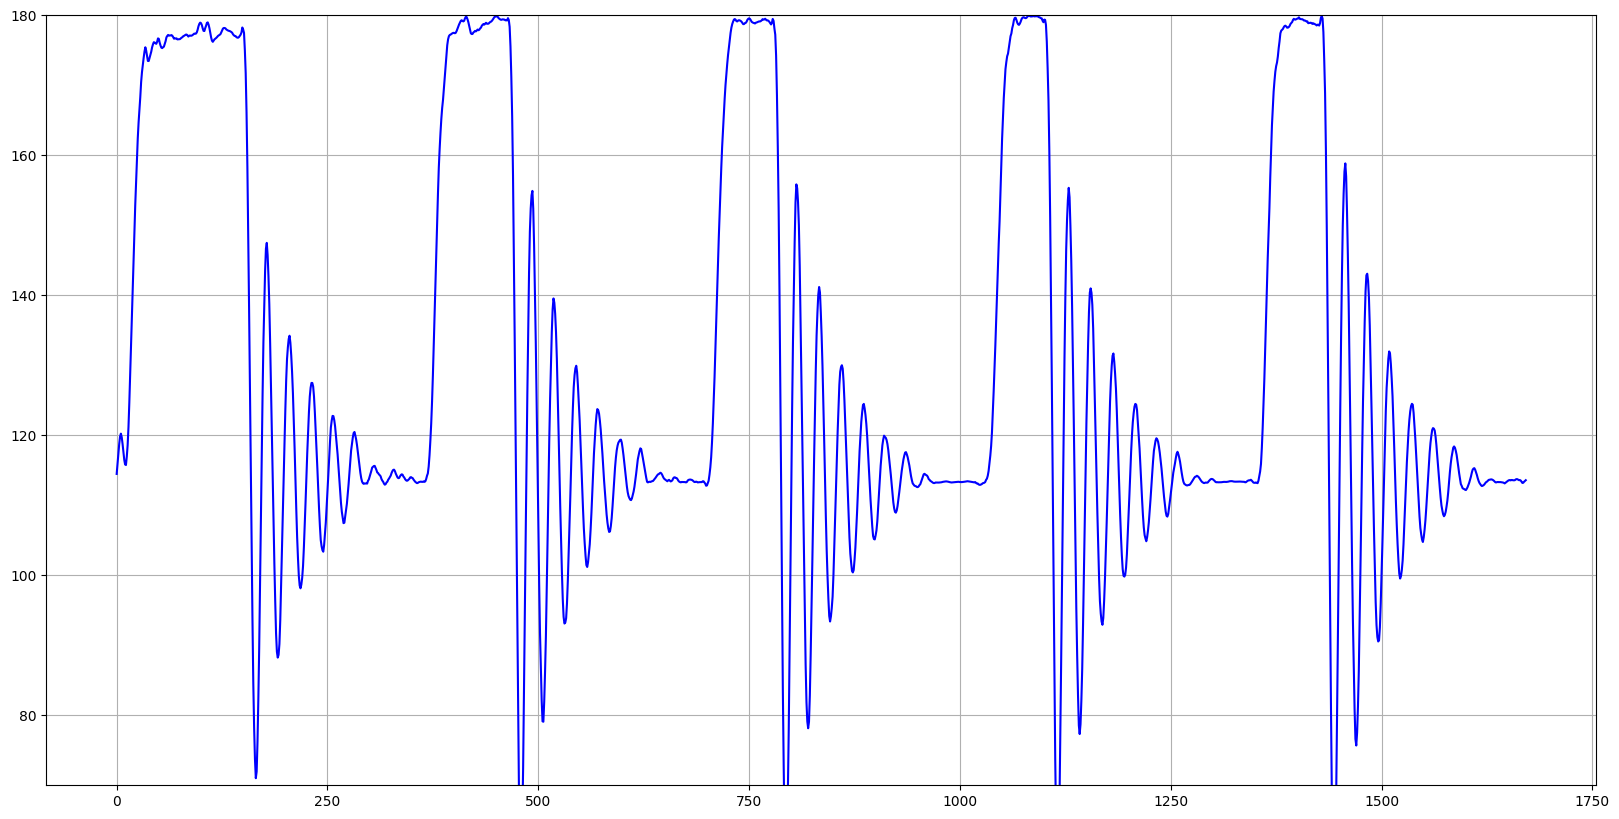

In [ ]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.signal
import pywt

df = pd.read_csv('angles_data_9to11.csv')
y = np.array(df['Angles'])
#coeffs = pywt.wavedec(y, 'db1', level=3)
#coeffs[1:] = [detail * 0.3 for detail in coeffs[1:]]
#smoothed_data = pywt.waverec(coeffs, 'db1')


y_smooth = scipy.signal.savgol_filter(y,11,3, mode= 'nearest')
y_mid = pd.Series(y_smooth)
y_moving1 = np.array(y_mid.rolling(1).mean())
y_moving2 = np.array(df['Angles'].rolling(3).mean())

x = np.array(range(len(y)))
fig = plt.figure(figsize=(20, 10))
# plt.plot(x, y_smooth, 'b', marker = 'o')
plt.plot(x, y_smooth, 'b')
plt.ylim(70, 180)
plt.grid(True)
plt.show()
